### Background
In this problem we will solve the German Tanks problem using both Frequentist and Bayesian approaches. The setup is as follows. During World War
II, the German army began construction of new, more agile tanks. Luckily for the Allies, the Germans labeled their tanks 1, 2, 3, ...,N, though N was unknown. Allied intelligence indicated that N = 1550. The Allies’ statisticians, however, used the labels from tanks that were destroyed in battle to estimate N, and came up with a much better estimate of N = 327. After the war, German records showed that N = 342. In this problem we will perform the same analysis as the Allied statisticians.

In [7]:
import random
import math
import pandas as pd
import numpy as np
from scipy.stats import norm
from scipy.stats import binom
from scipy.special import comb
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
serial_numbers_1=[331]
serial_numbers_2=[331,134, 306,  53, 272,  97, 100, 255,   3, 298]
serial_numbers_3=[111, 228, 139, 216,  36, 213, 189,  71, 184, 331, 49, 224, 173, 311,305, 208, 231, 285, 142,  22, 168, 263, 135, 149, 155]

The statisticians had a sample of k destroyed tanks, with serial numbers $Y_1, ...,Y_k$ which they assumed had been sampled uniformly at random from $\{1, ...,N\}$ without replacement.
Let us denote $Y(k)$ as the largest serial number in the sample of k tanks.

### Frequentist Method
- Some Theoretical Proof
1. The probability that maximum serial number, $Y(k) = i$ is given by:
<div align = "center">$\mathbb{P}(Y_{(k)}= i) 
    \begin{cases} 
      \frac{{i-1} \choose {k-1}}{N\choose k} ; & k\leq i\leq N  \\
      0; & otherwise
   \end{cases}$
    </div>
Recall that we assumed that the k tanks were sampled uniformly at random without
replacement from $\{1, ...,N\}$.

**Proof** : when $0 < i < k$, there's no way $i$ be the tank with largest serial number, so this prove the "otherwise" case; <br/><br/>
when $k \leq i \leq N$, $P(Y_{(k)} = i) = \frac{{1 \choose 1}{{i-1} \choose {k-1}}}{N\choose k}$, select k tanks from the a total of N tanks and the $i^{th}$ as the largest, select the rest $k-1$ from $i-1$ tanks.

2. Given the expression for $P(Y_{(k)} = i)$, 
<div align = "center"> $E[Y_{(k)}] = k\frac{N+1}{k+1}$
    </div>

**Proof**: recall the hocky-stick identity $\sum_{i = k}^{N}{i\choose k} = {{N+1} \choose {k+1}}$, that is $\sum_{i=k-1}^{N}{i\choose {k-1}} = {{N+1}\choose k}$



$E[Y_{(k)}] = \sum_{i=1}^{k-1}0 + \sum_{i=k}^{N}i\frac{i-1 \choose k-1}{N\choose k} = \frac{\sum_{i=k}^{N}i \frac{(i-1)!}{(k-1)!(i-k)!}}{N \choose k} = \frac{k\sum_{i=k}^{N}\frac{i!}{k!(i-k)!}}{N\choose k} = \frac{k\sum_{i=k}^{N}{i\choose k}}{N \choose k} = \frac{k{N+1\choose k+1}}{N\choose k} = k\frac{N+1}{k+1}$

3. Using the expression for $E[Y_{(k)}]$, the unbiased estimator $\hat N$ for
$N$<br/><br/>
<div align = "center">$\hat N = \frac{k+1}{k}Y_{(k)}-1$
    </div> <br/>
As you can see it's an unbiased estimator$E(\hat N) = E(\frac{k+1}{k}Y_{(k)}-1) = \frac{k+1}{k}E(Y_{(k)})-1$

In [12]:
def frequentist_estimator(serial_numbers):
    """ Returns the frequentist estimator for N, the total number of tanks, 
    given a sample of k tanks with maximum serial number Y_k
    
    Parameters
    ----------
        serial_numbers : list of observed tank serial numbers
    
    Returns: estimate N_hat
    """
    k = len(serial_numbers)
    Y_k = max(serial_numbers)
    return (k+1)/k *Y_k - 1

### Estimation given by Frequentist Method

In [6]:
print("Estimation of Serial 1: ", frequentist_estimator(serial_numbers_1))
print("Estimation of Serial 2: ", frequentist_estimator(serial_numbers_2))
print("Estimation of Serial 3: ", frequentist_estimator(serial_numbers_3))

Estimation of Serial 1:  661.0
Estimation of Serial 2:  363.1
Estimation of Serial 3:  343.24


### Bayesian Method
We will now take the Bayesian approach. To do this, we must first define
a prior $\pi(N)$ over N. For simplicity, we take a uniform prior over $N_{min}<Y_{(k)} < N_{max}$:
<div align = "center"> $\pi(N) = \begin{cases} 
      \frac{1}{N_{max} - N_{min}}; & N_{min}\leq N\leq N_{max}  \\
      0   ; & otherwise
   \end{cases}$
    </div>
Given this prior derive an expression for the posterior $P(N|Y_{(k)})$

$P(N|Y_{(k)}) = \frac{P(Y_{(k)}|N)P(N)}{P(Y_{(k)})}$, and since $P(Y_{(k)}|N) = \frac{i-1 \choose k-1}{N \choose k}$ <br/><br/>
Therefore, $P(Y_{(k)}|N)\propto \begin{cases} 
      \frac{i-1 \choose k-1}{N \choose k} \frac{1}{N_{max}-N_{min}}; & N_{min}\leq N\leq N_{max}  \\
      0   ; & otherwise
   \end{cases}$


In [4]:
def uniform_prior(n,Nmin=100,Nmax=1000):
    """ Returns the probability mass function of a uniform distribution on the integers from Nmin, Nmax
    
    Parameters
    ----------
        n : the value at which the prior is being evaluated.
        Nmin : lower bound on support of prior 
        Nmax : upper bound on support of prior 
    """
    assert Nmax>Nmin
    if n<=Nmax and n>=Nmin:
        return 1.0/(Nmax-Nmin)
    else:
        return 0.0

In [5]:
def posterior_distribution_with_uniform_prior(n,serial_numbers,Nmin=100,Nmax=1000):
    """ Returns the frequentist estimator for N, the total number of tanks, 
    given a sample of k tanks with maximum serial number Y_k
    
    Parameters
    ----------
        n : value of N
        serial_numbers : list of observed tank serial numbers
        Nmin : lower bound on support of prior 
        Nmax : upper bound on support of prior 
    
    Returns: P(N=n |serial_numbers)
    """
    ### get total density
    num_tanks = len(serial_numbers)
    y_k = max(serial_numbers)
    
    if ((n<max(Nmin,y_k)) or (n>Nmax)):
        return 0
    else:
        Pyk = 0
        for i in np.arange(y_k, Nmax + 1):
            Pyk += (uniform_prior(n,y_k,Nmax) * comb(y_k-1,num_tanks-1)/comb(i,num_tanks))
        
        posterior = (uniform_prior(n,y_k,Nmax)*comb(y_k-1,num_tanks-1)/comb(n,num_tanks))/Pyk
        return posterior

In [1]:
def plot_posteriors(serial_numbers,Nmin=100,Nmax=1000):
    """ Plots the uniform prior and the posterior P(N |Y_k)
    
    Parameters
    ----------
    serial_numbers : list of observed tank serial numbers
    Nmin: lower bound on support of prior 
    Nmax: upper bound on support of prior 
    """
    
    support=np.arange(Nmin-10,Nmax+10)
    uniform=[]
    posterior=[]
    for i in support:
        uniform.append(uniform_prior(i,Nmin,Nmax)) 
        posterior.append(posterior_distribution_with_uniform_prior(i,serial_numbers,Nmin,Nmax))
        

    plt.plot([0, 1], [0, 0], color='white', lw=1)
    plt.stem(support, uniform, linefmt='darkblue', label='Uniform prior')
    plt.stem(support, posterior, linefmt='green', lw=1, label='Posterior - w/uniform prior')
    plt.legend()
    return

In [14]:
def credible_interval(alpha,serial_numbers,Nmin=100,Nmax=1000):
    """ returns the credible interval at the level alpha
    
    Parameters
    ----------
    alpha: amount of probability mass encompassed by credible interval
    serial_numbers : list of observed tank serial numbers
    Nmin : lower bound on support of prior 
    Nmax : upper bound on support of prior 
    
    Returns: a list with the cutoffs for the credible intervals for N in the form
                interval=[lower,upper]
        
    """
    n = len(serial_numbers)

    ## store all posterios in a list
    all_pos = [posterior_distribution_with_uniform_prior(i,serial_numbers,Nmin,Nmax) for i in range(Nmin,Nmax+1)]
    
    ## initialize the bounds and cdf of 
    cdf = 0
    flag = 0 
    lower = -1
    upper = -1
    
    for i in range(len(all_pos)):
        cdf += all_pos[i]
        if cdf >= alpha/2 and flag == 0:
            flag = 1
            lower = Nmin + i
        if cdf >= (1 - alpha/2):
            upper = Nmin + i
            break
    
    return [lower, upper]

In [15]:
def plot_frequentist_estimate_and_credible_int(alpha,serial_numbers,Nmin=100,Nmax=1000):
    """ plots the posterior P(N| Y_k), the credible interval, and the frequentist estimate of N.
    
    Parameters
    ----------
    alpha : amount of probability mass encompassed by credible interval
    serial_numbers : list of observed tank serial numbers
    Nmin : lower bound on support of prior 
    Nmax : upper bound on support of prior 
    
    """
    #potential support of N
    support=np.arange(Nmin,Nmax)
    
    #potential support of N
    posterior=[]
    low_interval_probs=[]
    low_interval=[]
    upper_interval_probs=[]
    upper_interval=[]
    
    #gets credible_interval
    left_end, right_end = credible_interval(alpha,serial_numbers,Nmin,Nmax)
    
    #gets frequentist estimate
    frequentist_estimate=frequentist_estimator(serial_numbers)
    
    #print out information
    print("Credible Interval: "+str(left_end)+'-'+str(right_end))
    print("Frequentist Estimate: "+str(int(frequentist_estimate)))
    
    #keeps track of which elements in the support are in which intervals
    for i in support:
        prob=posterior_distribution_with_uniform_prior(i,serial_numbers,Nmin,Nmax)
        posterior.append(prob)
        if i<=left_end:
            low_interval_probs.append(prob)
            low_interval.append(i)
        if i>=right_end:
            upper_interval_probs.append(prob)
            upper_interval.append(i)
            
    #plot posterior
    plt.stem(support, posterior, linefmt='lightgreen',markerfmt='go',basefmt='None',label='Posterior - w/uniform prior')

    
    #plot credible interval
    plt.plot([left_end, right_end], [0, 0], color='darkblue', lw=5, label='Credible Interval')
    
    #plot the lower interval
    if len(low_interval)>0:
        markerline, stemlines, baseline = plt.stem(low_interval,low_interval_probs,markerfmt='o',linefmt='darkorange',  basefmt='None')
        markerline.set_markerfacecolor('darkorange')
        markerline.set_markersize(8)
        markerline.set_color('darkorange')
    
    #plot the higher interval
    if len(upper_interval)>0:
        markerline, stemlines, baseline=plt.stem(upper_interval, upper_interval_probs,markerfmt='o',linefmt='darkorange', basefmt='None')
        markerline.set_markerfacecolor('darkorange')
        markerline.set_markersize(8)
        markerline.set_color('darkorange')

    #plot the frequentist estimate
    plt.plot([frequentist_estimate,frequentist_estimate], [0,max(posterior)] ,'o-',color='red', lw=3, label='Frequentist Estimate')

    #Axes labels
    plt.title('Each Orange Area = '+str(alpha*50.0)+'%', fontsize=15)
    plt.xlabel('N')
    plt.ylabel('P(N|Y_k)')
    plt.legend(bbox_to_anchor=[1.0,1.0])
    return

### Series 1 Estimation

Credible Interval: 340-973
Frequentist Estimate: 661


<ipython-input-15-0629336bf428>:44: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(support, posterior, linefmt='lightgreen',markerfmt='go',basefmt='None',label='Posterior - w/uniform prior')
<ipython-input-15-0629336bf428>:52: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline, stemlines, baseline = plt.stem(low_interval,low_interval_probs,markerfmt='o',linefmt='darkorange',  basefmt='None')
<ipython-input-15-0629336bf428>:59: UserWarning: In Matplotlib 3.3 individual lines

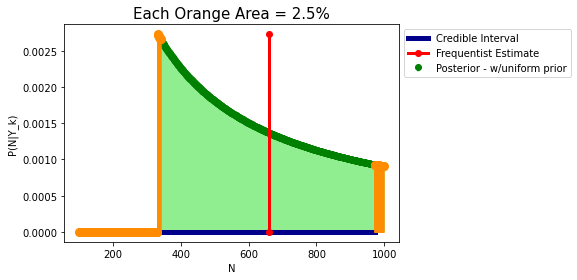

In [16]:
plot_frequentist_estimate_and_credible_int(0.05, serial_numbers_1,Nmin=100,Nmax=1000)


### Series 2 Estimation

Credible Interval: 331-496
Frequentist Estimate: 363


<ipython-input-15-0629336bf428>:44: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(support, posterior, linefmt='lightgreen',markerfmt='go',basefmt='None',label='Posterior - w/uniform prior')
<ipython-input-15-0629336bf428>:52: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline, stemlines, baseline = plt.stem(low_interval,low_interval_probs,markerfmt='o',linefmt='darkorange',  basefmt='None')
<ipython-input-15-0629336bf428>:59: UserWarning: In Matplotlib 3.3 individual lines

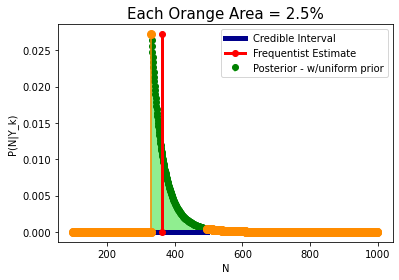

In [17]:
plot_frequentist_estimate_and_credible_int(0.05,serial_numbers_2,Nmin=100,Nmax=1000)


### Series 3 Estimation

Credible Interval: 331-383
Frequentist Estimate: 343


<ipython-input-15-0629336bf428>:44: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(support, posterior, linefmt='lightgreen',markerfmt='go',basefmt='None',label='Posterior - w/uniform prior')
<ipython-input-15-0629336bf428>:52: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline, stemlines, baseline = plt.stem(low_interval,low_interval_probs,markerfmt='o',linefmt='darkorange',  basefmt='None')
<ipython-input-15-0629336bf428>:59: UserWarning: In Matplotlib 3.3 individual lines

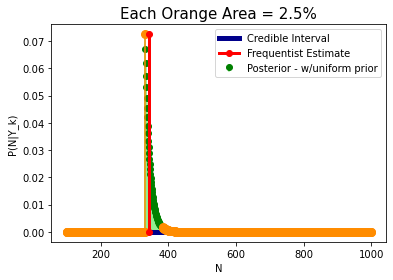

In [18]:
plot_frequentist_estimate_and_credible_int(0.05,serial_numbers_3,Nmin=100,Nmax=1000)


### Summary
Note that in all 3 number series, the largest number is 331, and with a larger number of sample size, the narrower credible interval we have. This intuitively makes sense, since with a the same large tank label we have, the more tanks we have in the sample, the closer the actual $N$ is to 331.